# Escalado
Conjunto de datos: iris (incluido en sklearn)
Este conjunto de datos es compacto y perfecto para demostrar técnicas de escalado.

In [1]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos
iris = load_iris(as_frame=True)
data = iris.data

In [3]:
# Visualizar las estadísticas iniciales
print("Estadísticas iniciales:")
data.describe()

Estadísticas iniciales:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Aplicar MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)

In [5]:
# Aplicar StandardScaler
standard_scaler = StandardScaler()
data_standard = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre las estadísticas originales y las del escalado MinMax?


In [7]:
# Comparar estadísticas originales vs MinMax
print('=== Estadísticas ORIGINALES ===')
print(data.describe().round(4))

print('\n=== Estadísticas después de MinMaxScaler ===')
print(data_minmax.describe().round(4))

print("""
Diferencias clave:
- MinMaxScaler transforma todos los valores al rango [0, 1].
- El mínimo siempre es 0 y el máximo siempre es 1 en todas las columnas.
- La media y std cambian proporcionalmente, pero la distribución relativa se conserva.
- Los datos originales tienen escalas muy distintas (ej. sepal length ~4-8 cm vs petal width ~0.1-2.5 cm);
  MinMax las pone en la misma escala sin distorsionar la forma de la distribución.
""")

=== Estadísticas ORIGINALES ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           150.0000          150.0000           150.0000   
mean              5.8433            3.0573             3.7580   
std               0.8281            0.4359             1.7653   
min               4.3000            2.0000             1.0000   
25%               5.1000            2.8000             1.6000   
50%               5.8000            3.0000             4.3500   
75%               6.4000            3.3000             5.1000   
max               7.9000            4.4000             6.9000   

       petal width (cm)  
count          150.0000  
mean             1.1993  
std              0.7622  
min              0.1000  
25%              0.3000  
50%              1.3000  
75%              1.8000  
max              2.5000  

=== Estadísticas después de MinMaxScaler ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           150.0000          150

### 2. Crea una gráfica de la distribución de la variable 'sepal length (cm)' antes y después del escalado.

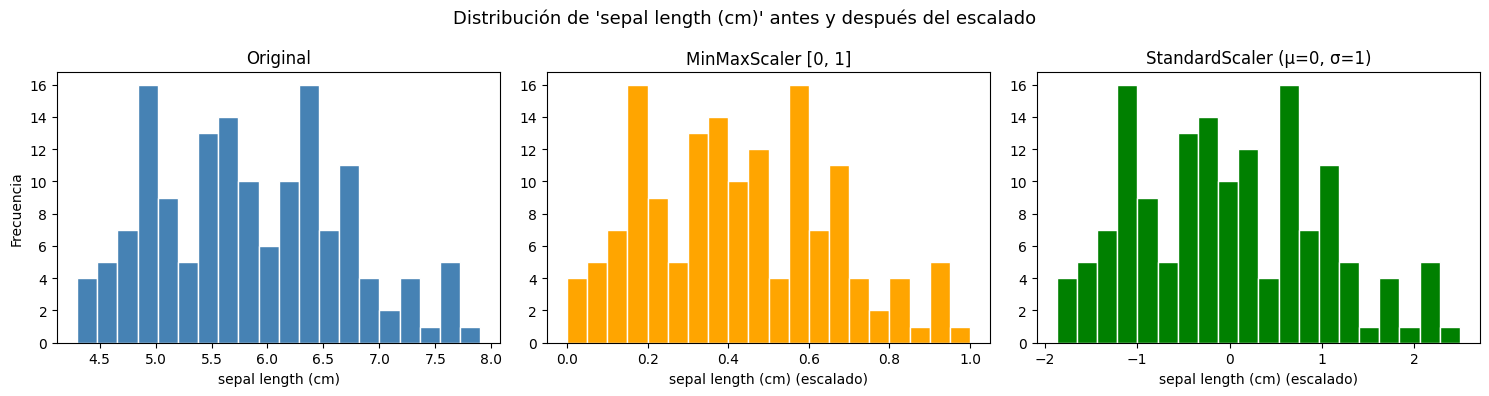

La forma de la distribución se conserva en ambos escalados; solo cambia el rango de valores.


In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

col = 'sepal length (cm)'

# Original
axes[0].hist(data[col], bins=20, color='steelblue', edgecolor='white')
axes[0].set_title('Original')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Frecuencia')

# MinMaxScaler
axes[1].hist(data_minmax[col], bins=20, color='orange', edgecolor='white')
axes[1].set_title('MinMaxScaler [0, 1]')
axes[1].set_xlabel(col + ' (escalado)')

# StandardScaler
axes[2].hist(data_standard[col], bins=20, color='green', edgecolor='white')
axes[2].set_title('StandardScaler (μ=0, σ=1)')
axes[2].set_xlabel(col + ' (escalado)')

plt.suptitle("Distribución de 'sepal length (cm)' antes y después del escalado", fontsize=13)
plt.tight_layout()
plt.show()
print('La forma de la distribución se conserva en ambos escalados; solo cambia el rango de valores.')

### 3. Crea una gráfica de dispersión entre 'sepal length (cm)' y 'sepal width (cm)' con los datos escalados por StandardScaler.

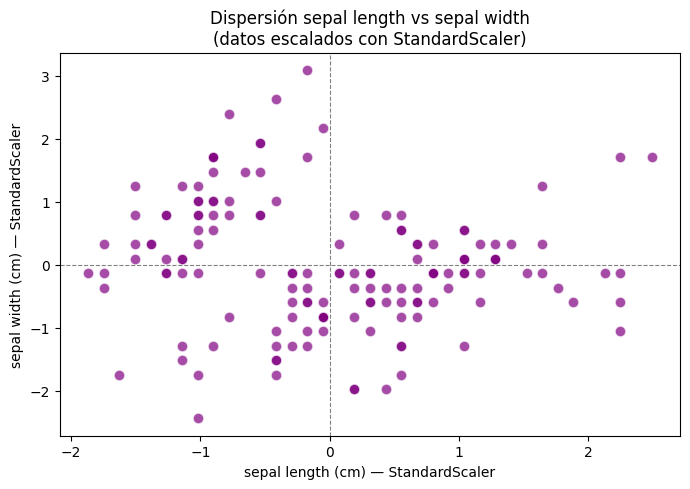

Con StandardScaler, ambas variables tienen media 0 y desviación estándar 1,
por lo que la nube de puntos está centrada en el origen.


In [11]:
plt.figure(figsize=(7, 5))
plt.scatter(
    data_standard['sepal length (cm)'],
    data_standard['sepal width (cm)'],
    alpha=0.7, color='purple', edgecolors='white', s=60
)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('sepal length (cm) — StandardScaler')
plt.ylabel('sepal width (cm) — StandardScaler')
plt.title('Dispersión sepal length vs sepal width\n(datos escalados con StandardScaler)')
plt.tight_layout()
plt.show()
print('Con StandardScaler, ambas variables tienen media 0 y desviación estándar 1,\npor lo que la nube de puntos está centrada en el origen.')

### 4. ¿Qué técnica de escalado crees que es más adecuada para este conjunto de datos? ¿Por qué?

Técnica recomendada para Iris: StandardScaler

Razones:
1. El dataset Iris no contiene outliers extremos, por lo que StandardScaler
   (que asume distribución aproximadamente normal) es apropiado.

2. Algoritmos como SVM, KNN, PCA o Regresión Logística se benefician de
   datos centrados en 0 con desviación estándar 1, que es lo que produce StandardScaler.

3. MinMaxScaler sería preferible si:
   - El algoritmo requiere valores estrictamente en [0, 1] (ej. redes neuronales).
   - Los datos no siguen una distribución normal.
   - Existen pocos o ningún outlier que pueda comprimir el rango.

4. Para Iris, dado que las variables tienen unidades distintas (cm) y escalas
   ligeramente diferentes, StandardScaler garantiza que ninguna variable
   domine sobre otra en distancia o varianza, lo cual es clave para clasificación.